In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\cosmicray_filter.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


'0.0.51'

In [2]:
## Load in Fityk data
df_Fyk=pd.read_excel('Fityk_results.xlsx', sheet_name='112820_FULL') 

In [3]:
df_DF=pd.read_excel('Calibration_fitting.xlsx')
df_DF['Measurement']=df_DF['filename_x']

In [4]:
combo=pd.merge(df_Fyk, df_DF, on='Measurement', how='left')

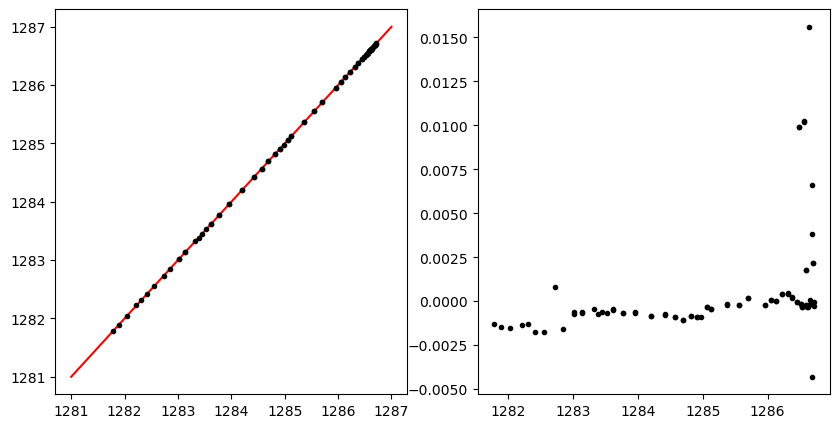

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([1281, 1287], [1281, 1287], '-r')
ax1.plot(combo['Diad1_Voigt_Cent'], combo['1285cm-1'],
               '.k')
ax2.plot(combo['Diad1_Voigt_Cent'], combo['Diad1_Voigt_Cent']-combo['1285cm-1'],
               '.k')

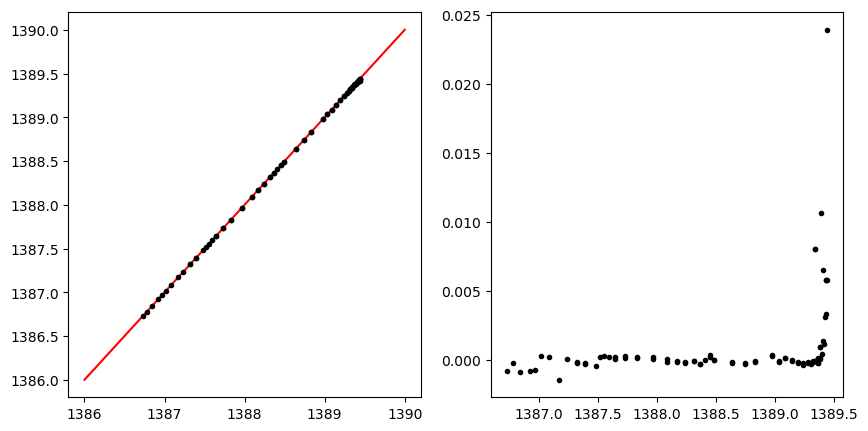

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([1386, 1390], [1386, 1390], '-r')
ax1.plot(combo['Diad2_Voigt_Cent'], combo['1389cm-1'],
               '.k')
ax2.plot(combo['Diad2_Voigt_Cent'], combo['Diad2_Voigt_Cent']-combo['1389cm-1'],
               '.k')

## Splitting (Uncorrected)

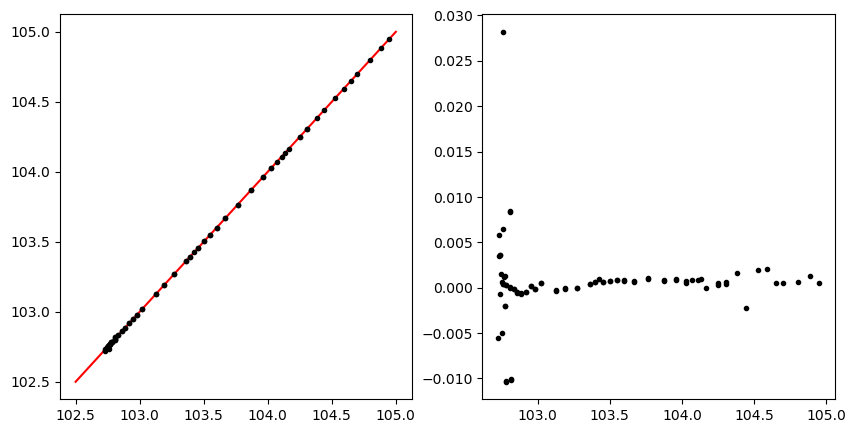

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([102.5, 105], [102.5, 105], '-r')
ax1.plot(combo['Splitting'], combo['∆CO2 uncorr (cm-1)'],
               '.k')
ax2.plot(combo['Splitting'], combo['Splitting']-combo['∆CO2 uncorr (cm-1)'],
               '.k')

## Splitting (Corrected)
- Bigger difference as we use regression of Ne lines vs time, not side-by-side

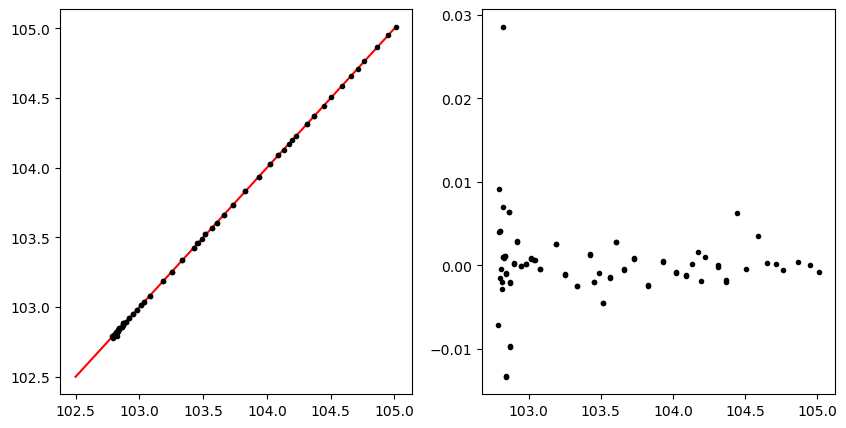

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([102.5, 105], [102.5, 105], '-r')
ax1.plot(combo['Corrected_Splitting'], combo['∆CO2 corr (cm-1-Lam)'],
               '.k')
ax2.plot(combo['Corrected_Splitting'], combo['Corrected_Splitting']-combo['∆CO2 corr (cm-1-Lam)'],
               '.k')

(-0.01, 0.1)

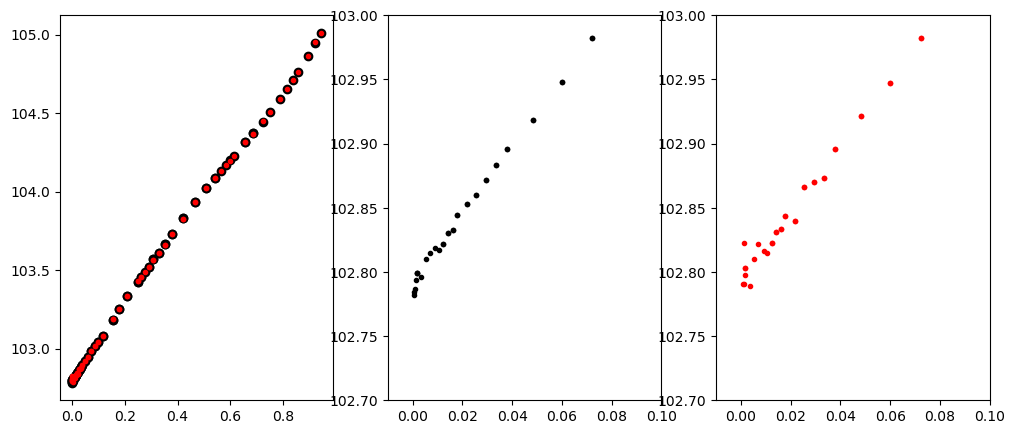

In [9]:
## Regression of Pressure vs. splitting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))
#ax1.plot([102.5, 105], [102.5, 105], '-r')
ax1.plot(combo['Density  (g/ml)'], combo['∆CO2 corr (cm-1-Lam)'],
               'ok')
ax1.plot(combo['Density  (g/ml)'], combo['Corrected_Splitting'],
               '.r')

ax2.plot(combo['Density  (g/ml)'], combo['∆CO2 corr (cm-1-Lam)'],
               '.k')
ax3.plot(combo['Density  (g/ml)'], combo['Corrected_Splitting'],
               '.r')
ax2.set_ylim([102.7, 103])
ax2.set_xlim([-0.01, 0.1])
ax3.set_ylim([102.7, 103])
ax3.set_xlim([-0.01, 0.1])

In [13]:
combo.loc[(combo['Corrected_Splitting']-combo['∆CO2 corr (cm-1-Lam)'])<-0.005]

,Date,time,Measurement,1285cm-1,1389cm-1,∆CO2 uncorr (cm-1),∆CO2 corr (cm-1-Lam),P(Mpa),P(Median-MPa),P(MAD-MPa),...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
60,2020-11-28,22:31:51,POC38,1286.4811,1389.3024,102.8213,102.883013,1.79,1.797662,0.000534,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:31:51 PM\n,81111.0,1341.0,1.000605
61,2020-11-28,22:31:51,POC38,1286.4811,1389.3024,102.8213,102.883013,1.79,1.797662,0.000534,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:31:51 PM\n,81111.0,1341.0,1.000605
66,2020-11-28,22:54:43,POC41,1286.5554,1389.3430,102.7876,102.852812,1.20,1.201548,0.000342,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:54:43 PM\n,82483.0,1341.0,1.000606
67,2020-11-28,22:54:43,POC41,1286.5554,1389.3430,102.7876,102.852812,1.20,1.201548,0.000342,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:54:43 PM\n,82483.0,1341.0,1.000606
80,2020-11-29,1900-01-01 00:09:49,POC50,1286.6844,1389.4162,102.7318,102.796105,0.20,0.200760,0.000307,...,29.0,NaN,45.0,5.0,5.0,"['0h', '3m', '46s']",12:09:42 AM\n,86982.0,1341.0,1.000611
